In [1]:
import numpy as np
import matplotlib.pyplot as plt


class Backtracking:
    """ Armijo backtracking line search [1, p.33, (3.4)].

    Reference:
        [1] Jorge Nocedal, Stephen J. Wright, Numerical Optimization, 2nd edition.
    """

    def __init__(
            self,
            c1=1e-4,
            rate=0.5,
            max_iter=100,
            alpha0=1):
        self.c1 = c1
        self.rate = rate
        self.max_iter = max_iter
        self.alpha0 = alpha0
        self.it = 0

    @staticmethod
    def name():
        return "backtracking"

    def __call__(self, fun, x, grad):
        f_x = fun(x)
        alpha = self.alpha0
        g_norm2 = np.linalg.norm(grad)**2
        for _ in range(self.max_iter):
            h = fun(x - alpha * grad) + alpha * self.c1 * g_norm2
            if f_x > h: break
            alpha *= self.rate
            self.it += 1
        return alpha


In [2]:
def f(x):
    return 2.0 * x[0]**2 + 0.5 * x[1]**2

def grad_f(x):
    return np.array([4.0 * x[0], x[1]])

x = [3.000, 3.000], f(x) = 22.5
x = [-3.000, 1.500], f(x) = 19.125, alpha = 0.500
x = [3.000, 0.750], f(x) = 18.281, alpha = 0.500
x = [-3.000, 0.375], f(x) = 18.070, alpha = 0.500
x = [3.000, 0.188], f(x) = 18.018, alpha = 0.500
x = [-3.000, 0.094], f(x) = 18.004, alpha = 0.500
x = [0.000, 0.070], f(x) = 0.002, alpha = 0.250
x = [0.000, 0.000], f(x) = 0.000, alpha = 1.000


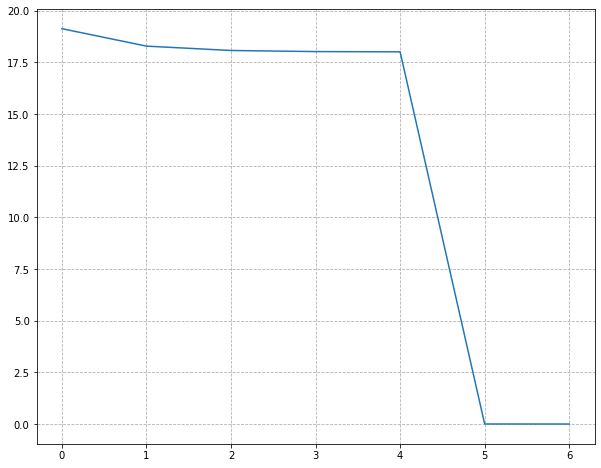

In [3]:
x0 = np.array([3., 3.])

xk = x0

f_list, xk_list = [], []
print(f"x = [{xk[0]:.3f}, {xk[1]:.3f}], f(x) = {f(xk)}")

linesearch = Backtracking()

for _ in range(20):
    gk = grad_f(xk)
    alpha = linesearch(f, xk, gk)

    xk = xk - alpha * gk
    
    print(f"x = [{xk[0]:.3f}, {xk[1]:.3f}], f(x) = {f(xk):.3f}, alpha = {alpha:.3f}")
    xk_list.append(xk)
    f_list.append(f(xk))
    if f(xk) < 1e-3:
        break


plt.figure(figsize=(10, 8))
plt.plot(f_list)
plt.grid(True, linestyle='--')
plt.savefig("conv_plot.png")
plt.show()

In [17]:
import torch

x1 = torch.tensor([3.], requires_grad=True)
x2 = torch.tensor([3.], requires_grad=True)

In [18]:
y = f([x1, x2])

In [20]:
torch.autograd.grad(y, x2)

(tensor([3.]),)

In [12]:
grad_f(x.detach().numpy())

array([12.,  3.])